In [74]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

# import k-means from clustering stage
from sklearn.cluster import KMeans

from requests import request
import json
from pandas.io.json import json_normalize
print('Folium installed')
print('Libraries imported.')

import matplotlib.cm as cm
import matplotlib.colors as colors

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.7.12

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.7.12

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.

Folium installed
Libraries imported.


In [48]:
CLIENT_ID = 'KKMVU5M1FXYCWDFYVXQXMEQ2SFODLRI5JN3WOHUQCY2QDBCS' # your Foursquare ID
CLIENT_SECRET = 'THGMSKEFR3CQG45M1WQMHDTARDLQVJ4VDU3ONMXU1VFKARMV' # your Foursquare Secret
VERSION = '20191017'
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: KKMVU5M1FXYCWDFYVXQXMEQ2SFODLRI5JN3WOHUQCY2QDBCS
CLIENT_SECRET:THGMSKEFR3CQG45M1WQMHDTARDLQVJ4VDU3ONMXU1VFKARMV


In [49]:
address = 'Charlotte, NC'


geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

35.2270869 -80.8431268


In [50]:
LIMIT = 100
radius = 500
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?client_id=KKMVU5M1FXYCWDFYVXQXMEQ2SFODLRI5JN3WOHUQCY2QDBCS&client_secret=THGMSKEFR3CQG45M1WQMHDTARDLQVJ4VDU3ONMXU1VFKARMV&ll=35.2270869,-80.8431268&v=20191017&radius=500&limit=100'

In [51]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5da7f3b4446ea60039399820'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'},
    {'name': '$-$$$$', 'key': 'price'}]},
  'headerLocation': 'Uptown',
  'headerFullLocation': 'Uptown, Charlotte',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 137,
  'suggestedBounds': {'ne': {'lat': 35.231586904500006,
    'lng': -80.83762826307836},
   'sw': {'lat': 35.2225868955, 'lng': -80.84862533692163}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4bad5829f964a52071483be3',
       'name': 'Blumenthal Performing Arts Center',
       'location': {'address': '130 N Tryon St',
        'crossStreet': 'at 5th St',
        'lat': 35.22792953956913,
        'lng': -80

In [52]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [53]:
#pull the actual data from the Foursquare API

venues = results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues)
filtered_columns = ['venue.name', 'venue.id', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

nearby_venues

,venue.name,venue.id,venue.categories,venue.location.lat,venue.location.lng
0,Blumenthal Performing Arts Center,4bad5829f964a52071483be3,Performing Arts Venue,35.227930,-80.841951
1,Belk Theater,4b058640f964a520495a22e3,Concert Hall,35.227711,-80.841663
2,The Capital Grille,4b05863ef964a520f45922e3,American Restaurant,35.228216,-80.841974
3,The Punch Room,549af5b3498e3a660685323b,Hotel Bar,35.226354,-80.841747
4,Vapiano,4e2ffb921838f1c552ca5f70,Italian Restaurant,35.226234,-80.844124
...,...,...,...,...,...
95,Soho Bistro,4b0d86eff964a5203e4a23e3,Chinese Restaurant,35.227504,-80.840373
96,Levine Museum of the New South,4b05863df964a520d85922e3,History Museum,35.228249,-80.838701
97,Showmars,4c360bfb93db0f479d641d92,Greek Restaurant,35.224887,-80.843337
98,Latta Arcade,4b058641f964a520755a22e3,Shopping Mall,35.225811,-80.846607


In [54]:
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]
nearby_venues

,name,id,categories,lat,lng
0,Blumenthal Performing Arts Center,4bad5829f964a52071483be3,Performing Arts Venue,35.227930,-80.841951
1,Belk Theater,4b058640f964a520495a22e3,Concert Hall,35.227711,-80.841663
2,The Capital Grille,4b05863ef964a520f45922e3,American Restaurant,35.228216,-80.841974
3,The Punch Room,549af5b3498e3a660685323b,Hotel Bar,35.226354,-80.841747
4,Vapiano,4e2ffb921838f1c552ca5f70,Italian Restaurant,35.226234,-80.844124
...,...,...,...,...,...
95,Soho Bistro,4b0d86eff964a5203e4a23e3,Chinese Restaurant,35.227504,-80.840373
96,Levine Museum of the New South,4b05863df964a520d85922e3,History Museum,35.228249,-80.838701
97,Showmars,4c360bfb93db0f479d641d92,Greek Restaurant,35.224887,-80.843337
98,Latta Arcade,4b058641f964a520755a22e3,Shopping Mall,35.225811,-80.846607


In [55]:
nearby_venues['categories'].unique()

array(['Performing Arts Venue', 'Concert Hall', 'American Restaurant',
       'Hotel Bar', 'Italian Restaurant', 'Restaurant',
       'Tapas Restaurant', 'Burger Joint', 'Pizza Place',
       'Other Nightlife', 'Gym / Fitness Center', 'Steakhouse',
       'Creperie', 'Irish Pub', 'New American Restaurant',
       'Thai Restaurant', 'Theater', 'Southern / Soul Food Restaurant',
       'Seafood Restaurant', 'Sandwich Place', 'Café',
       'Salon / Barbershop', 'Smoothie Shop', 'Taco Place',
       'Sushi Restaurant', 'Hotel', 'Bistro', 'Science Museum',
       'Mexican Restaurant', 'Plaza', 'French Restaurant', 'Bar', 'Pub',
       'Souvenir Shop', 'Fast Food Restaurant', 'Bakery', 'Burrito Place',
       'Wine Bar', 'Deli / Bodega', 'Gym', 'Bowling Alley', 'Sports Bar',
       'Lounge', 'Park', 'Coffee Shop', 'Neighborhood',
       'Basketball Stadium', 'Pharmacy', 'Cocktail Bar', 'Diner',
       'BBQ Joint', 'Chocolate Shop', 'Hot Dog Joint', 'Bank',
       'Movie Theater', 'Farmers M

In [56]:
removal_list = ['Performing Arts Venue', 'Concert Hall', 'Gym / Fitness Center', 'Theater', 'Salon / Barbershop', 'Science Museum','Plaza', 
                'Souvenir Shop', 'Deli / Bodega', 'Gym', 'Bowling Alley', 'Park', 'Neighborhood', 'Basketball Stadium', 'Pharmacy', 'Bank',
                'Movie Theater', 'Farmers Market', 'History Museum', 'Shopping Mall']
nearby_new_venues = nearby_venues.copy()
nearby_new_venues = nearby_new_venues[~nearby_new_venues['categories'].isin(removal_list)]
nearby_new_venues

,name,id,categories,lat,lng
2,The Capital Grille,4b05863ef964a520f45922e3,American Restaurant,35.228216,-80.841974
3,The Punch Room,549af5b3498e3a660685323b,Hotel Bar,35.226354,-80.841747
4,Vapiano,4e2ffb921838f1c552ca5f70,Italian Restaurant,35.226234,-80.844124
5,Coco and the Director,57a85cb7498ebb2205737e6d,Restaurant,35.227684,-80.843548
6,Dandelion Market,4b466381f964a5206f1f26e3,Tapas Restaurant,35.228656,-80.842479
...,...,...,...,...,...
92,Not Just Coffee,4cd3543b793d224bff884810,Coffee Shop,35.227537,-80.838005
94,BlackFinn American Saloon,4b11c4c8f964a520488423e3,Bar,35.225275,-80.842027
95,Soho Bistro,4b0d86eff964a5203e4a23e3,Chinese Restaurant,35.227504,-80.840373
97,Showmars,4c360bfb93db0f479d641d92,Greek Restaurant,35.224887,-80.843337


In [57]:
venue_id_list = nearby_new_venues['id'].tolist()
venue_id_list

['4b05863ef964a520f45922e3',
 '549af5b3498e3a660685323b',
 '4e2ffb921838f1c552ca5f70',
 '57a85cb7498ebb2205737e6d',
 '4b466381f964a5206f1f26e3',
 '4f516ba8e4b063296bf04765',
 '512ce91be4b049302dc9d4cb',
 '511e6b27e4b0d5834393f063',
 '4d9a5bf18163a35d26ec597e',
 '4bb14a46f964a520fa893ce3',
 '4b25a00ff964a520b67424e3',
 '4af8ba4cf964a520830f22e3',
 '4f6a445ce4b0ac9953bbcdd9',
 '4b05863bf964a520785922e3',
 '4b001776f964a520b93a22e3',
 '4f8b5454e4b00a6263a38774',
 '4b09c3fef964a520311d23e3',
 '4b1980d9f964a52088de23e3',
 '57a56d1f498e5952a14f86f4',
 '4bd07af1caff952185dfcef0',
 '4e84b7815503e18a129b1cb4',
 '5ae7e6746bdee6002c84ed22',
 '564cb152498eb31a4de6fd79',
 '576eb02b498e5c4439a993cd',
 '4b4a7e43f964a520368926e3',
 '55dbe199498ef4a77a86e19a',
 '5359d80e498e2eeb152a95dd',
 '4b075a9af964a52086fc22e3',
 '4b058639f964a520155922e3',
 '578f979238fa479c94b3ee0e',
 '4c23a655f3859c7420c56488',
 '4b2a2dd6f964a520d7a524e3',
 '4b227205f964a520df4624e3',
 '4b05863ff964a520345a22e3',
 '5b639c99cabc

In [58]:
list_url = []
list_like = []
list_json = []

for i in venue_id_list:
    venue_url = 'https://api.foursquare.com/v2/venues/{}/likes?client_id={}&client_secret={}&v={}'.format(i, CLIENT_ID, CLIENT_SECRET, VERSION)
    list_url.append(venue_url)
for link in list_url:
    result = requests.get(link).json()
    likes = result['response']['likes']['count']
    list_like.append(likes)
print(list_like)

[96, 21, 206, 36, 235, 90, 160, 30, 514, 85, 85, 153, 53, 283, 56, 212, 111, 47, 29, 98, 35, 8, 16, 37, 13, 34, 24, 44, 78, 40, 137, 16, 19, 168, 18, 14, 24, 8, 0, 113, 41, 14, 16, 179, 25, 45, 125, 13, 42, 24, 39, 74, 25, 12, 19, 15, 7, 99, 18, 44, 10, 100, 67, 33, 36, 100, 190, 1, 120, 10, 8, 8, 180, 186, 32, 14, 62]


In [59]:
clt_venues = nearby_new_venues.copy()
clt_venues.head()

,name,id,categories,lat,lng
2,The Capital Grille,4b05863ef964a520f45922e3,American Restaurant,35.228216,-80.841974
3,The Punch Room,549af5b3498e3a660685323b,Hotel Bar,35.226354,-80.841747
4,Vapiano,4e2ffb921838f1c552ca5f70,Italian Restaurant,35.226234,-80.844124
5,Coco and the Director,57a85cb7498ebb2205737e6d,Restaurant,35.227684,-80.843548
6,Dandelion Market,4b466381f964a5206f1f26e3,Tapas Restaurant,35.228656,-80.842479


In [60]:
clt_venues['total likes'] = list_like
clt_venues.head()

,name,id,categories,lat,lng,total likes
2,The Capital Grille,4b05863ef964a520f45922e3,American Restaurant,35.228216,-80.841974,96
3,The Punch Room,549af5b3498e3a660685323b,Hotel Bar,35.226354,-80.841747,21
4,Vapiano,4e2ffb921838f1c552ca5f70,Italian Restaurant,35.226234,-80.844124,206
5,Coco and the Director,57a85cb7498ebb2205737e6d,Restaurant,35.227684,-80.843548,36
6,Dandelion Market,4b466381f964a5206f1f26e3,Tapas Restaurant,35.228656,-80.842479,235


In [102]:
print(clt_venues['total likes'].max())
print(clt_venues['total likes'].min())
print(clt_venues['total likes'].median())
print(clt_venues['total likes'].mean())

514
0
39.0
71.15584415584415


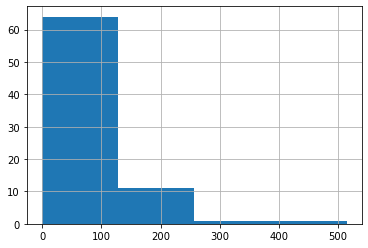

In [106]:
import matplotlib.pyplot as plt
clt_venues['total likes'].hist(bins=4)
plt.show()

In [113]:
print(np.percentile(clt_venues['total likes'], 33))
print(np.percentile(clt_venues['total likes'], 66))

24.0
74.64000000000001


In [115]:
poor = clt_venues['total likes']<=24
avg = clt_venues[(clt_venues['total likes']>24) & (clt_venues['total likes']<=75)]
great = clt_venues['total likes']>75

In [116]:
def conditions(s):
    if s['total likes']<=24:
        return 'poor'
    if s['total likes']<=75:
        return 'avg'
    if s['total likes']>75:
        return 'great'

clt_venues['total likes_cat']=clt_venues.apply(conditions, axis=1)

In [118]:
clt_venues

,name,id,categories,lat,lng,total likes,total likes_cat,categories_new,label
2,The Capital Grille,4b05863ef964a520f45922e3,American Restaurant,35.228216,-80.841974,96,great,food,1
3,The Punch Room,549af5b3498e3a660685323b,Hotel Bar,35.226354,-80.841747,21,poor,bars,2
4,Vapiano,4e2ffb921838f1c552ca5f70,Italian Restaurant,35.226234,-80.844124,206,great,food,1
5,Coco and the Director,57a85cb7498ebb2205737e6d,Restaurant,35.227684,-80.843548,36,avg,food,0
6,Dandelion Market,4b466381f964a5206f1f26e3,Tapas Restaurant,35.228656,-80.842479,235,great,food,1
...,...,...,...,...,...,...,...,...,...
92,Not Just Coffee,4cd3543b793d224bff884810,Coffee Shop,35.227537,-80.838005,180,great,other,1
94,BlackFinn American Saloon,4b11c4c8f964a520488423e3,Bar,35.225275,-80.842027,186,great,bars,1
95,Soho Bistro,4b0d86eff964a5203e4a23e3,Chinese Restaurant,35.227504,-80.840373,32,avg,food,0
97,Showmars,4c360bfb93db0f479d641d92,Greek Restaurant,35.224887,-80.843337,14,poor,food,2


In [119]:
clt_venues['categories'].unique()

array(['American Restaurant', 'Hotel Bar', 'Italian Restaurant',
       'Restaurant', 'Tapas Restaurant', 'Burger Joint', 'Pizza Place',
       'Other Nightlife', 'Steakhouse', 'Creperie', 'Irish Pub',
       'New American Restaurant', 'Thai Restaurant',
       'Southern / Soul Food Restaurant', 'Seafood Restaurant',
       'Sandwich Place', 'Café', 'Smoothie Shop', 'Taco Place',
       'Sushi Restaurant', 'Hotel', 'Bistro', 'Mexican Restaurant',
       'French Restaurant', 'Bar', 'Pub', 'Fast Food Restaurant',
       'Bakery', 'Burrito Place', 'Wine Bar', 'Sports Bar', 'Lounge',
       'Coffee Shop', 'Cocktail Bar', 'Diner', 'BBQ Joint',
       'Chocolate Shop', 'Hot Dog Joint', 'Chinese Restaurant',
       'Greek Restaurant'], dtype=object)

In [120]:
bars = ['Hotel Bar', 'Other Nightlife', 'Irish Pub', 'Bar', 'Pub', 'Wine Bar', 'Sports Bar', 'Lounge', 'Cocktail Bar']
other = ['Café', 'Smoothie Shop', 'Sandwich Place', 'Taco Place', 'Bistro', 'Hotel','Bakery', 'Coffee Shop', 'Chocolate Shop', 'Creperie', 'Burrito Place'
        'BBQ Joint', 'Hot Dog Joint']
food = ['American Restaurant', 'Italian Restaurant','Restaurant', 'Tapas Restaurant', 'Burger Joint', 'Pizza Place', 'Steakhouse',
        'New American Restaurant', 'Thai Restaurant', 'Southern / Soul Food Restaurant', 'Seafood Restaurant',
        'Sushi Restaurant', 'Mexican Restaurant', 'French Restaurant', 'Fast Food Restaurant', 'Diner', 'Chinese Restaurant', 'Greek Restaurant']

def conditions1(s):
    if s['categories'] in bars:
        return 'bars'
    if s['categories'] in other:
        return 'other'
    if s['categories'] in food:
        return 'food'

clt_venues['categories_new']=clt_venues.apply(conditions1, axis=1)

In [121]:
clt_venues

,name,id,categories,lat,lng,total likes,total likes_cat,categories_new,label
2,The Capital Grille,4b05863ef964a520f45922e3,American Restaurant,35.228216,-80.841974,96,great,food,1
3,The Punch Room,549af5b3498e3a660685323b,Hotel Bar,35.226354,-80.841747,21,poor,bars,2
4,Vapiano,4e2ffb921838f1c552ca5f70,Italian Restaurant,35.226234,-80.844124,206,great,food,1
5,Coco and the Director,57a85cb7498ebb2205737e6d,Restaurant,35.227684,-80.843548,36,avg,food,0
6,Dandelion Market,4b466381f964a5206f1f26e3,Tapas Restaurant,35.228656,-80.842479,235,great,food,1
...,...,...,...,...,...,...,...,...,...
92,Not Just Coffee,4cd3543b793d224bff884810,Coffee Shop,35.227537,-80.838005,180,great,other,1
94,BlackFinn American Saloon,4b11c4c8f964a520488423e3,Bar,35.225275,-80.842027,186,great,bars,1
95,Soho Bistro,4b0d86eff964a5203e4a23e3,Chinese Restaurant,35.227504,-80.840373,32,avg,food,0
97,Showmars,4c360bfb93db0f479d641d92,Greek Restaurant,35.224887,-80.843337,14,poor,food,2


In [122]:
clt_onehot = pd.get_dummies(clt_venues[['categories_new', 'total likes_cat']], prefix="", prefix_sep="")

clt_onehot['Name'] = clt_venues['name'] 

fixed_columns = [clt_onehot.columns[-1]] + list(clt_onehot.columns[:-1])
clt_onehot = clt_onehot[fixed_columns]

clt_onehot.head()

,Name,bars,food,other,avg,great,poor
2,The Capital Grille,0,1,0,0,1,0
3,The Punch Room,1,0,0,0,0,1
4,Vapiano,0,1,0,0,1,0
5,Coco and the Director,0,1,0,1,0,0
6,Dandelion Market,0,1,0,0,1,0


In [123]:
cluster_df = clt_onehot.drop('Name', axis=1)

k_clusters = 3

# run k-means clustering
kmeans = KMeans(n_clusters=k_clusters, random_state=0).fit(cluster_df)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:3]

array([1, 2, 1], dtype=int32)

In [124]:
clt_venues['label'] = kmeans.labels_
clt_venues.head()

,name,id,categories,lat,lng,total likes,total likes_cat,categories_new,label
2,The Capital Grille,4b05863ef964a520f45922e3,American Restaurant,35.228216,-80.841974,96,great,food,1
3,The Punch Room,549af5b3498e3a660685323b,Hotel Bar,35.226354,-80.841747,21,poor,bars,2
4,Vapiano,4e2ffb921838f1c552ca5f70,Italian Restaurant,35.226234,-80.844124,206,great,food,1
5,Coco and the Director,57a85cb7498ebb2205737e6d,Restaurant,35.227684,-80.843548,36,avg,food,0
6,Dandelion Market,4b466381f964a5206f1f26e3,Tapas Restaurant,35.228656,-80.842479,235,great,food,1


In [125]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(k_clusters)
ys = [i+x+(i*x)**2 for i in range(k_clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(clt_venues['lat'], clt_venues['lng'], clt_venues['name'], clt_venues['label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [127]:
clt_venues.loc[clt_venues['label']==0]

,name,id,categories,lat,lng,total likes,total likes_cat,categories_new,label
5,Coco and the Director,57a85cb7498ebb2205737e6d,Restaurant,35.227684,-80.843548,36,avg,food,0
9,Uncle Maddio's Pizza,511e6b27e4b0d5834393f063,Pizza Place,35.225999,-80.843157,30,avg,food,0
15,Hazelnuts Creperie,4f6a445ce4b0ac9953bbcdd9,Creperie,35.226510,-80.844477,53,avg,other,0
17,BLT Steak,4b001776f964a520b93a22e3,Steakhouse,35.226289,-80.841601,56,avg,food,0
21,Fleming's Prime Steakhouse & Wine Bar,4b1980d9f964a52088de23e3,Steakhouse,35.225608,-80.842753,47,avg,food,0
22,Stoke,57a56d1f498e5952a14f86f4,Restaurant,35.228057,-80.843475,29,avg,food,0
24,Bar Cocoa at The Ritz-Carlton,4e84b7815503e18a129b1cb4,Hotel Bar,35.226242,-80.841604,35,avg,bars,0
27,Not Just Coffee,576eb02b498e5c4439a993cd,Café,35.226891,-80.846126,37,avg,other,0
30,204 North Kitchen & Cocktails,55dbe199498ef4a77a86e19a,American Restaurant,35.227895,-80.841523,34,avg,food,0
32,Room 112,4b075a9af964a52086fc22e3,Sushi Restaurant,35.227335,-80.843484,44,avg,food,0


In [128]:
clt_venues.loc[clt_venues['label']==1]

,name,id,categories,lat,lng,total likes,total likes_cat,categories_new,label
2,The Capital Grille,4b05863ef964a520f45922e3,American Restaurant,35.228216,-80.841974,96,great,food,1
4,Vapiano,4e2ffb921838f1c552ca5f70,Italian Restaurant,35.226234,-80.844124,206,great,food,1
6,Dandelion Market,4b466381f964a5206f1f26e3,Tapas Restaurant,35.228656,-80.842479,235,great,food,1
7,Rooster's Wood Fired Kitchen II,4f516ba8e4b063296bf04765,American Restaurant,35.226856,-80.841229,90,great,food,1
8,Cowbell Burger & Bar,512ce91be4b049302dc9d4cb,Burger Joint,35.228371,-80.842196,160,great,food,1
10,EpiCentre,4d9a5bf18163a35d26ec597e,Other Nightlife,35.225615,-80.841981,514,great,bars,1
12,Aria Tuscan Grill,4bb14a46f964a520fa893ce3,Italian Restaurant,35.226615,-80.842317,85,great,food,1
13,Ruth's Chris Steak House,4b25a00ff964a520b67424e3,Steakhouse,35.226158,-80.845154,85,great,food,1
14,Chima Brazilian Steakhouse,4af8ba4cf964a520830f22e3,Steakhouse,35.226304,-80.843949,153,great,food,1
16,Rí Rá Irish Pub,4b05863bf964a520785922e3,Irish Pub,35.228134,-80.841582,283,great,bars,1


In [129]:
clt_venues.loc[clt_venues['label']==2]

,name,id,categories,lat,lng,total likes,total likes_cat,categories_new,label
3,The Punch Room,549af5b3498e3a660685323b,Hotel Bar,35.226354,-80.841747,21,poor,bars,2
25,Eddie V's Prime Seafood,5ae7e6746bdee6002c84ed22,Seafood Restaurant,35.226875,-80.843260,8,poor,food,2
26,Which Wich Uptown,564cb152498eb31a4de6fd79,Sandwich Place,35.226412,-80.842841,16,poor,other,2
29,Smoothie King,4b4a7e43f964a520368926e3,Smoothie Shop,35.225545,-80.842321,13,poor,other,2
31,Vida Vida,5359d80e498e2eeb152a95dd,Taco Place,35.225971,-80.842244,24,poor,other,2
38,Jimmy John's,4b2a2dd6f964a520d7a524e3,Sandwich Place,35.225909,-80.845806,16,poor,other,2
39,Luce Restaurant & Bar,4b227205f964a520df4624e3,Italian Restaurant,35.227982,-80.841263,19,poor,food,2
41,La Belle Helene,5b639c99cabcff002cbe11b1,French Restaurant,35.225283,-80.845659,18,poor,food,2
42,Kimpton Tryon Park Hotel,59e10d20bcbf7a4735d6d29c,Hotel,35.225821,-80.846079,14,poor,other,2
43,Bentley's Restaurant on 27,4b05863ef964a520e95922e3,French Restaurant,35.224956,-80.843364,24,poor,food,2
